# Analysis and Visualisation of WeRateDogs Twitter Archive

Given data from the WeRateDogs twitter archive, I would like to investigate what influences the numerator rating given to each dog. I would also like to see if there is any obvious relationship between these ratings and the number of likes and retweets a tweet gets.

To start with, I'll load the necessary libraries and the twitter archive dataset to be used.

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Make plots show in window
%matplotlib inline
sns.set()

In [3]:
#load data
twitter_archive = pd.read_csv('twitter_archive_master.csv')

In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


As a start, let's look at a plot between the number of retweets and the number of favorites(likes) each tweet in our dataset has.

Text(0.5, 1.0, 'favorite_count vs retweet_count')

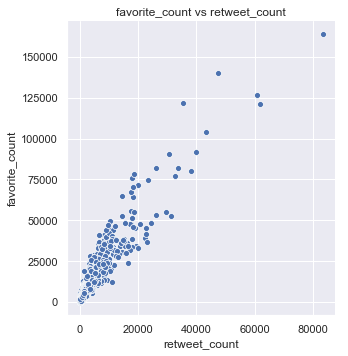

In [14]:
sns.relplot(data = twitter_archive, x = 'retweet_count', y = 'favorite_count')
plt.title('favorite_count vs retweet_count')

From here, we can see that there is a stong positive correlation between the number of retweets a tweet gets and the number of likes the tweet gets. This makes sense since most people who like a tweet often times retweet it as well.

What would be interesting is to see whether the ratings given in the tweets have any form of correlation with how often a tweet is retweeted or liked. This relationship is explored using a scatterplot below

Text(0.5, 1.0, 'retweet_count vs numerator rating')

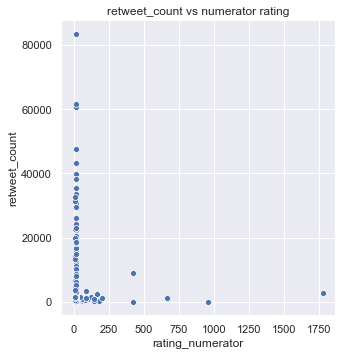

In [15]:
sns.relplot(data = twitter_archive, y = 'retweet_count', x = 'rating_numerator')
plt.title('retweet_count vs numerator rating')

Most of the relationship here has been hidden away due to the presence of outliers in the numerator rating. Excessively large rating values are due to the inconsistencies in the rating of the dog provided by WeRateDogs.
As a solution, I'll use matplotlib's xlim function to limit the highest value of numerator rating to 15 as seen below.

Text(0.5, 1.0, 'Zoomed in version of retweet_count vs rating_numerator')

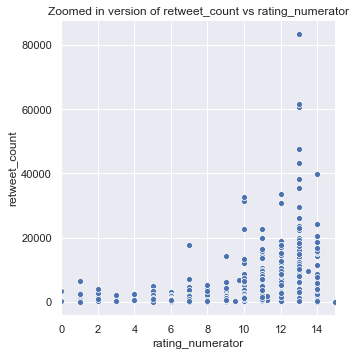

In [16]:
sns.relplot(data = twitter_archive, y = 'retweet_count', x = 'rating_numerator')
plt.xlim(0, 15)
plt.title('Zoomed in version of retweet_count vs rating_numerator')

Here, it is much easier to easier to see that increasing numerator rating actually implies higher number of retweets , and hence number of favorites. This might be much easier to see using the line plot below.

Text(0.5, 1.0, 'Line plot of retweet_count vs rating_numerator')

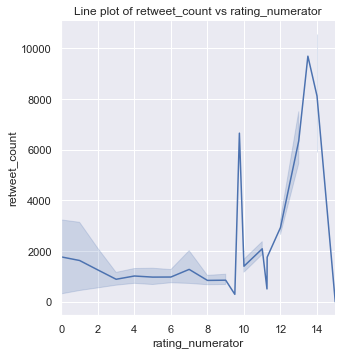

In [17]:
sns.relplot(data = twitter_archive, x = 'rating_numerator', y = 'retweet_count', kind = 'line')
plt.xlim(0, 15)
plt.title('Line plot of retweet_count vs rating_numerator')

Here it is much more obvious that higher numerator rating implies more retweets and, hence, likes due to their correlation.

One way to explore the variation of a continuous variable with a categorical variable is to use the boxplot. Here, the boxplots will be faceted over some of the categorical variables present in the dataset.  The aim is to explore the relationship between the variables of interest, i.e *retweet_count*, *rating_numerator*, and the catogrical variable *stage*.
The boxplots of *favorite_count* across the different dog stages is shown below.

Text(0.5, 1.0, 'Boxplot of favorite_count for each dog stage')

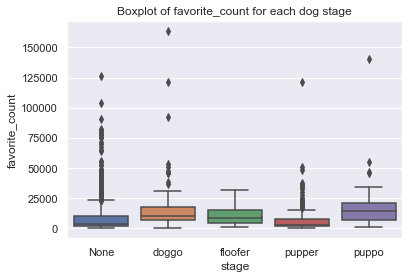

In [18]:
sns.boxplot(data = twitter_archive, x = 'stage', y = 'favorite_count')
plt.title('Boxplot of favorite_count for each dog stage')

This plot doesn't show a lot, so I'll use the plt.ylim function to limit the y-axis to about 40000

Text(0.5, 1.0, ' Zoomed-in Boxplot of favorite_count for each dog stage')

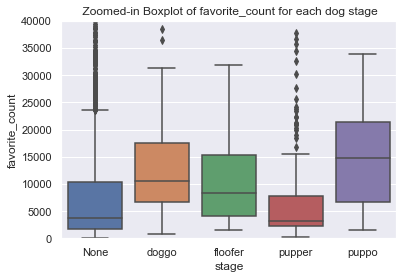

In [19]:
sns.boxplot(data = twitter_archive, x = 'stage', y = 'favorite_count')
plt.ylim(0, 40000)
plt.title(' Zoomed-in Boxplot of favorite_count for each dog stage')

In [11]:
twitter_archive.stage.value_counts()

None       1829
pupper      234
doggo        87
puppo        25
floofer      10
Name: stage, dtype: int64

From the boxplots above, it is seen that **puppo** dogs have the biggest *favorite_count* median while **pupper** dogs have the lowest, apart from the cases where *stage* is **None**. Of course, this is probably affected by the fact that, except **None**, there are more **puppers** than any other stage.

Lastly, I will explore how the rating given to each dog, i.e *rating_numerator* is distributed for each dog stage. This is shown below, with the y-axis being limited between 5 and 15 so as to make the plots easier to read and make sense of.

Text(0.5, 1.0, 'Boxplot of rating_numerator for each dog stage')

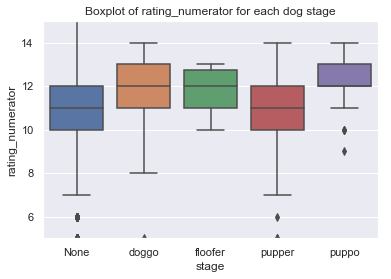

In [20]:
sns.boxplot(data = twitter_archive, x = 'stage', y = 'rating_numerator')
plt.ylim(5, 15)
plt.title('Boxplot of rating_numerator for each dog stage')

In [13]:
twitter_archive.groupby('stage').describe()['rating_numerator']

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1829.0,13.566435,52.009895,0.0,10.0,11.0,12.00,1776.0
doggo,87.0,11.770115,1.545445,5.0,11.0,12.0,13.00,14.0
floofer,10.0,11.800000,1.032796,10.0,11.0,12.0,12.75,13.0
pupper,234.0,10.753291,1.733079,3.0,10.0,11.0,12.00,14.0
puppo,25.0,12.080000,1.255654,9.0,12.0,12.0,13.00,14.0


From the boxplots and the table above, one can see that the median rating is 12 except for the **pupper** stage and **None**. **Puppos** have a first quartile of 12 and a median of 12 which means one is very likely to get a rating of 12 if the dog stage is **Puppo**.